# LAB 4 : Multi Layered Neural Netwrok and Backpropogation  

Name : 

Roll Number : 

Referrence Material : 
      
  1. **Chapter 4:, page no. 106-136, Artificial Neural Network by B. Yegnanarayana)**

  2. https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

  3. https://www.geeksforgeeks.org/deep-neural-net-with-forward-and-back-propagation-from-scratch-python/

  4. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

  5. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484

#**Problem 1** : Demonstrate the working principle of multi layer neural network, with non-linearly separable and non-convex data.

Observation to be demonstrated:
1. Two layer neural network (i.e one output layer) not able to classify non-linearly
separable data. Solve the problem by increasing the no. of layer and changing the
activation function from hard-limiting to sigmoid.
2. Similar observations have to be demonstrated for non-convex data.(i.e 3 layer network not able to learn the appropriate separating hyper plane, which being resolved
using 4 layer network.)
3. Show that, using sigmoid activation, the gradient vanishing/ exploding happens
during training, try to resolve this problem by changing the activation function.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Programming : 
  Please write a program to demonstrate the same

**Step 1** : Data Generation, Generate Non Linearly Seperable and Non Convex Data

**Step 2** : Demonstrate how two layered neural network (perceptron without a hidden layer) fails to classify non linearly separable data

**Step 3** : Demonstrate how addition of a hidden layer helps in overcoming this problem (Backpropogation)

**Step 4** : Demonstrate how 3 Layered Neural network fails on non convex data and 4 layered (2 hidden layers) helps solve this problem

**Step 5** : Demonstrate the effect of Vanishing/Exploding gradients occur and how you can solve it

In [1]:
import numpy as np
import sklearn.datasets as dt
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

**Non Linear Data**

(300, 2)
(300,)


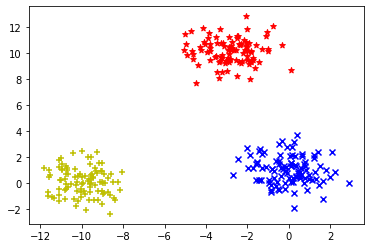

torch.Size([300, 2])
torch.Size([300])


In [2]:
## Write your code here

def NonLinearData():

  u1 = np.array([-10,0])
  u2 = np.array([-3,10])
  u3 = np.array([0,1])
  
  v1 = v2 = v3 = v4 = np.identity(2)
  
  c1 = np.random.multivariate_normal(u1,v1,100)
  c2 = np.random.multivariate_normal(u2,v2,100)
  c3 = np.random.multivariate_normal(u3,v3,100)
  
  data_k = c1
  data_k = np.append(data_k,c2, axis=0)
  data_k = np.append(data_k,c3, axis=0)

  print(data_k.shape)
  

  y1 = np.zeros(100)
  y2 = np.ones(100)
  y3 = np.add(np.ones(100),np.ones(100))

  labels = y1
  labels = np.append(labels,y2,axis=0)
  labels = np.append(labels,y3,axis=0)

  print(labels.shape)

  plt.scatter(c1[:,0], c1[:,1],marker = '+',color='y')
  plt.scatter(c2[:,0], c2[:,1],marker = '*',color='r')
  plt.scatter(c3[:,0], c3[:,1],marker = 'x',color='b')
  plt.show()

  return data_k,labels

x1,label1 = NonLinearData()
x1 = torch.tensor(x1)
label1 = torch.tensor(label1)

print(x1.shape)
print(label1.shape)

**Non Convex Data**

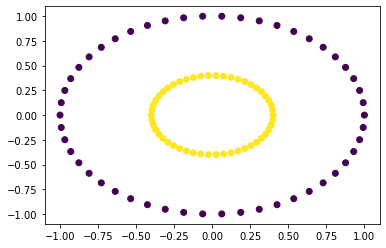

torch.Size([100, 2])
torch.Size([100])


In [3]:
def NonConvexData():

  x,label = dt.make_circles(factor = 0.4)
  my_scatter_plot = plt.scatter(x[:, 0],
                              x[:, 1],
                              c=label,
                              vmin=min(label),
                              vmax=max(label)
                              )

  plt.show()

  return x,label

x,label = NonConvexData()
x = torch.tensor(x)
label = torch.tensor(label)

print(x.shape)
print(label.shape)



In [4]:
def XORdata():

  x_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
  y_xor = np.array([0, 1, 1, 0])

  return x_xor,y_xor

x_xor,y_xor = XORdata()

x_xor = torch.tensor(x_xor)
y_xor = torch.tensor(y_xor)

print(x_xor.shape)
print(y_xor.shape)

torch.Size([4, 2])
torch.Size([4])


**Two Layered Network**

tensor([[-1.5224],
        [ 3.0634]], dtype=torch.float64)


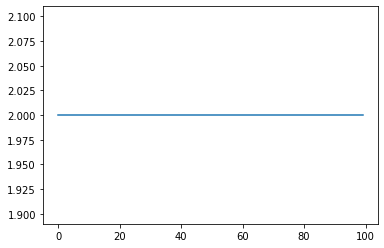

In [5]:
def TwoLayerNet(X,Y):

  X = X.double()
  Y = Y.double()
  lr = 0.01
  w = torch.randn(X.shape[1]).reshape(X.shape[1],1).double()
  #b = 0
  w1 = []
  w2 = []
  err = []
  max_epochs = 100
  for eps in range(max_epochs):
    
    a = torch.matmul(X,w)
    val = []

    for i in range(len(a)):
      if a[i]>0:
         val.append(1)
      else:
         val.append(0)
    val = torch.tensor(val)
    
    delta = (Y - val).reshape(Y.shape[0],1)
    error =  torch.sum(torch.abs(delta))
    w += lr*(torch.matmul(X.T,delta))
    
    w1.append(w[0])
    w2.append(w[1])
    err.append(error)

  plt.plot(err)
  print(w) 
  return err,w


err,w = TwoLayerNet(x_xor,y_xor)
    
    

In [6]:
label = label.reshape([label.shape[0],1])
dataset = np.concatenate([x,label],axis=-1)
dataset.shape

dataset = dataset.tolist()

In [7]:
label1 = label1.reshape([label1.shape[0],1])
dataset1 = np.concatenate([x1,label1],axis=-1)
dataset1.shape

dataset1 = dataset1.tolist()

In [8]:
label_xor = y_xor.reshape([y_xor.shape[0],1])
dataset_xor = np.concatenate([x_xor,label_xor],axis=-1)
dataset_xor.shape

dataset_xor = dataset_xor.tolist()

**Deep Neural Network (>2 Layers)**

In [9]:
from math import exp
from random import seed
from random import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 

def transfer(activation,f):
  if f == 'ReLU':
    
    if activation > 0:
      return activation
    else:
      return 0

  if f == 'Sigmoid':
    return 1.0 / (1.0 + exp(-activation))
  
  if f == 'None':
    if activation>0:
      return 1
    else:
      return 0

def transfer_derivative(output,f):
  
  if f == 'ReLU':
    
    if output<=0:
      output = 0
    else:
      output = 1
    return output
  
  if f == 'Sigmoid':
    return output*(1.0-output)
  
  if f == 'None':
    return 0

# Forward propagate input to a network output
def forward_propagate(network, row,f):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation,f)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected,f):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'],f)
 
# Update network weights with error
def update_weights(network, row, l_rate,f):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
## Train

def train_network(network,train,l_rate,n_epoch,n_outputs,f):
  err = []
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
      outputs = forward_propagate(network,row,f)
      expected = [0 for i in range(n_outputs)]
      expected[int(row[-1])] = 1
      sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
      backward_propagate_error(network,expected,f)
      update_weights(network,row,l_rate,f)
    #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    err.append(sum_error)
  
  return err
# Test training backprop algorithm


**Solving XOR problem using 3 Layered Network**

[{'weights': [-6.6107552581619595, 6.845854800815282, 3.3321902699860453], 'output': 0.9725404293566142, 'delta': 0.0006195327641371748}, {'weights': [-5.689847640833271, 5.472978308765148, -2.9391096844843903], 'output': 0.04086204706603499, 'delta': -0.0009719256203274065}]
[{'weights': [6.686614775945585, -7.145806396609015, -3.102515817851696], 'output': 0.9572348252373748, 'delta': 0.0017506486475854543}, {'weights': [-6.709800545962976, 7.1745290923927145, 3.112244630263105], 'output': 0.042290786949477834, 'delta': -0.001712873137493103}]


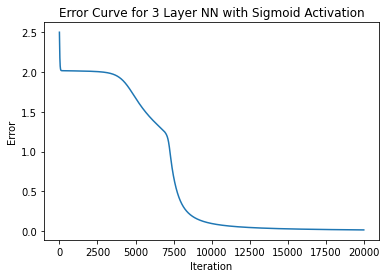

In [10]:
seed(1)
n_inputs = len(dataset_xor[0]) - 1
n_outputs = len(set([row[-1] for row in dataset_xor]))
network = initialize_network(n_inputs,2, n_outputs)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset_xor, 0.05, 20000, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Curve for 3 Layer NN with Sigmoid Activation')

for layer in network:
  print(layer)

**3 Layered Network**

Text(0.5, 1.0, 'Error Curve for 3 Layer NN with Sigmoid Activation')

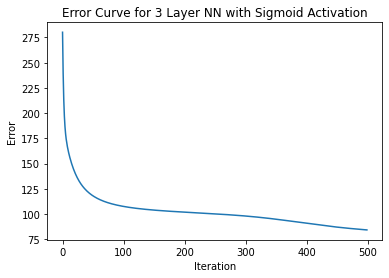

In [11]:
seed(1)
n_inputs = len(dataset1[0]) - 1
n_outputs = len(set([row[-1] for row in dataset1]))
network = initialize_network(n_inputs,1, n_outputs)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset1, 0.01, 500, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Curve for 3 Layer NN with Sigmoid Activation')

**4 Layered Network**

Text(0.5, 1.0, 'Error Curve for 4 Layer NN with Sigmoid Activation')

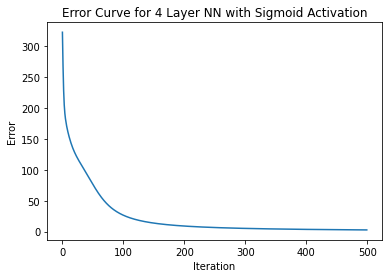

In [12]:
seed(1)
n_inputs = len(dataset1[0]) - 1
n_outputs = len(set([row[-1] for row in dataset1]))
network = initialize_network(n_inputs,2, n_outputs)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset1, 0.01, 500, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Curve for 4 Layer NN with Sigmoid Activation')

**Vanishing Gradient Problem**

Text(0.5, 1.0, 'Error Curve for 5 Layer NN with Sigmoid Activation')

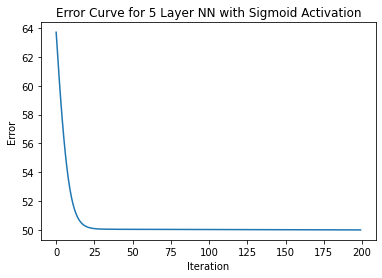

In [13]:
## With Sigmoid
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,3, n_outputs)

# for layer in network:
# 	print(layer)

f = 'Sigmoid'
err = train_network(network, dataset, 0.01, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Curve for 5 Layer NN with Sigmoid Activation')

**Solved Vanishing Gradient Problem**

Text(0.5, 1.0, 'Error Curve for 5 Layer NN with ReLU Activation')

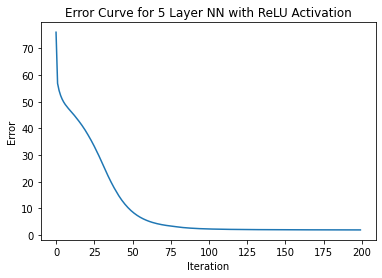

In [14]:
seed(1)
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs,3, n_outputs)

# for layer in network:
# 	print(layer)

f = 'ReLU'
err = train_network(network, dataset, 0.01, 200, n_outputs,f)
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error Curve for 5 Layer NN with ReLU Activation')

## Inferences and Conclusion : State all the key observations and conclusion